In [1]:
import pandas as pd
import time 

In [2]:
data = pd.read_excel("Sheet_2.0-1.0_task.xls")

In [3]:
t1 = time.time()
t1

1628664213.6866813

In [4]:
data

,entry price,exit price,p&l,atr_perc,roc,rsi
0,540.00,542.05,1797.85,0.212054,68.956580,49.17
1,534.15,533.45,-388.50,0.339687,982.763663,34.60
2,536.10,534.40,-1162.80,0.272566,-11.526762,60.07
3,538.10,540.50,1790.40,0.249302,156.146465,63.28
4,541.85,540.75,-1122.00,0.180979,-10.250543,71.59
...,...,...,...,...,...,...
565,2089.85,2100.10,1834.75,0.267025,413.767896,59.21
566,2102.30,2096.80,-1149.50,0.227035,189.051591,62.61
567,2092.30,2087.65,-1157.85,0.191770,-34.201782,47.73
568,2090.60,2086.35,-1156.00,0.175644,23.375503,57.14


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   entry price  570 non-null    float64
 1   exit price   570 non-null    float64
 2   p&l          570 non-null    float64
 3   atr_perc     570 non-null    float64
 4   roc          570 non-null    float64
 5   rsi          570 non-null    float64
dtypes: float64(6)
memory usage: 26.8 KB


In [6]:
data.describe()

,entry price,exit price,p&l,atr_perc,roc,rsi
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,1305.750000,1305.505175,-25.398158,0.446337,794.089290,61.617860
std,484.829838,484.217076,1367.562510,0.398000,14603.851506,10.750483
min,507.300000,505.900000,-1170.550000,0.150859,-94.990008,28.400000
25%,930.125000,928.812500,-1146.600000,0.312752,-20.543939,54.312500
50%,1226.650000,1226.750000,-1137.750000,0.380411,68.796195,61.535000
75%,1621.300000,1613.437500,1828.287500,0.470153,260.863125,68.915000
max,2359.050000,2343.400000,1848.000000,8.044882,348756.541000,92.400000


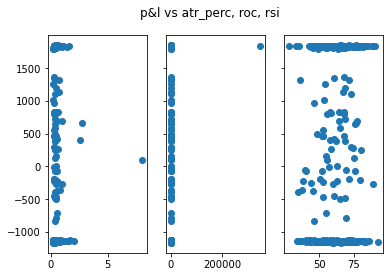

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3, sharex=False, sharey=True)
fig.suptitle('p&l vs atr_perc, roc, rsi')
axs[0].scatter(data['atr_perc'], data['p&l'])
axs[1].scatter(data['roc'], data['p&l'])
axs[2].scatter(data['rsi'], data['p&l']);

In [8]:
data.drop(['entry price','exit price'], axis=1).corr()

,p&l,atr_perc,roc,rsi
p&l,1.000000,0.014292,0.056807,0.096374
atr_perc,0.014292,1.000000,0.035240,0.009512
roc,0.056807,0.035240,1.000000,-0.041520
rsi,0.096374,0.009512,-0.041520,1.000000


In [9]:
data_sort_atr = data.sort_values("atr_perc")

In [10]:
data_sort_roc = data.sort_values("roc")

In [11]:
data_sort_rsi = data.sort_values("rsi")

In [12]:
import sys
 
# Function to print continuous sublist with the largest sum in a given list
def largest_sublist(A):
 
    # base case
    if len(A) <= 1:
        return A
 
    # stores the maximum sum sublist found so far
    maxSoFar = -sys.maxsize
 
    # stores the maximum sum of sublist ending at the current position
    maxEndingHere = 0
 
    # stores endpoints of maximum sum sublist found so far
    start = 0
    end = 0
 
    # stores starting index of a positive-sum sequence
    beg = 0
 
    # traverse the given list
    for i in range(len(A)):
 
        # update the maximum sum of sublist "ending" at index `i`
        maxEndingHere = maxEndingHere + A[i]
 
        # if the maximum sum becomes less than the current element,
        # start from the current element
        if maxEndingHere < A[i]:
            maxEndingHere = A[i]
            beg = i
 
        # update result if the current sublist sum is found to be greater
        if maxSoFar < maxEndingHere:
            maxSoFar = maxEndingHere
            start = beg
            end = i
 
    #print("The continuous sublist with the largest sum is", A[start: end + 1])
    print("start_postion {}. end_position {}, max_sum = {}".format(start, end, sum(A[start: end + 1])))

In [13]:
largest_sublist(list(data_sort_atr['p&l']))

start_postion 279. end_position 366, max_sum = 33171.20000000001


In [14]:
largest_sublist(list(data_sort_roc['p&l']))

start_postion 95. end_position 254, max_sum = 25561.899999999994


In [15]:
largest_sublist(list(data_sort_rsi['p&l']))

start_postion 210. end_position 568, max_sum = 33821.7


In [16]:
atr_min = data_sort_atr.reset_index()["atr_perc"][279]
atr_max = data_sort_atr.reset_index()["atr_perc"][366]
print(atr_min, atr_max)

0.377552772 0.425851233


best range of atr_perc for maximum p&l is: (0.377552772, 0.425851233)
and corresponding p&l is: 33171.20000000001

In [17]:
roc_min = data_sort_roc.reset_index()["roc"][95]
roc_max = data_sort_roc.reset_index()["roc"][254]
print(roc_min, roc_max)

-40.77695853 48.20817165


best range of roc for maximum p&l is: (-40.77695853, 48.20817165)
and corresponding p&l is: 25561.899999999994

In [18]:
rsi_min = data_sort_rsi.reset_index()["rsi"][210]
rsi_max = data_sort_rsi.reset_index()["rsi"][568]
print(rsi_min, rsi_max)

58.02 89.72


best range of rsi for maximum p&l is: (58.02, 89.72) and corresponding p&l is: 33821.7

In [19]:
#data_sort_rsi.head(10)
data_sort_rsi.iloc[210:569]['p&l'].sum()

33821.7

In [20]:
data_sort_rsi_atr = data_sort_rsi.iloc[210:569].sort_values("atr_perc")
data_sort_rsi_atr

,entry price,exit price,p&l,atr_perc,roc,rsi
67,716.35,718.30,1803.75,0.150859,-31.080220,60.21
123,915.55,913.85,-1140.70,0.162815,250.086714,65.60
61,713.05,711.60,-1132.45,0.179611,-40.979527,73.79
4,541.85,540.75,-1122.00,0.180979,-10.250543,71.59
66,716.80,715.15,-1153.35,0.199595,-88.295404,63.56
...,...,...,...,...,...,...
393,1029.40,1055.85,1825.05,1.403165,-76.024538,68.99
391,1011.25,994.65,-1145.40,1.429067,7.319056,74.52
390,957.55,985.75,1833.00,1.602561,-12.233007,59.84
392,931.55,941.10,401.10,2.542629,-56.357667,58.06


In [21]:
largest_sublist(list(data_sort_rsi_atr['p&l']))

start_postion 40. end_position 230, max_sum = 62789.20000000004


In [22]:
atr_min_revised = data_sort_rsi_atr.reset_index()["atr_perc"][40]
atr_max_revised = data_sort_rsi_atr.reset_index()["atr_perc"][230]
print(atr_min_revised, atr_max_revised)

0.274223035 0.427709112


In [23]:
data_sort_rsi_atr.iloc[40:231]['p&l'].sum()

62789.200000000004

In [24]:
data_sort_rsi_atr_roc = data_sort_rsi_atr.iloc[40:231].sort_values("roc")
data_sort_rsi_atr_roc

,entry price,exit price,p&l,atr_perc,roc,rsi
491,2025.95,2028.80,464.55,0.302724,-81.904177,68.00
227,1069.25,1064.60,-1153.20,0.376440,-81.302822,66.93
267,1223.55,1218.65,-1146.60,0.349370,-79.129650,58.22
76,802.50,806.65,1826.00,0.283078,-77.729271,62.52
141,932.75,928.45,-1152.40,0.399163,-77.444624,60.20
...,...,...,...,...,...,...
537,1931.20,1945.65,1835.15,0.406882,1099.792088,67.52
41,703.65,700.45,-1142.40,0.399202,1205.851085,82.49
63,693.90,699.00,1825.80,0.402859,1671.842313,67.74
64,714.20,714.85,245.70,0.370578,2633.788326,79.97


In [25]:
largest_sublist(list(data_sort_rsi_atr_roc['p&l']))

start_postion 3. end_position 189, max_sum = 65773.30000000003


In [26]:
roc_min_revised = data_sort_rsi_atr_roc.reset_index()["roc"][3]
roc_max_revised = data_sort_rsi_atr_roc.reset_index()["roc"][189]
print(roc_min_revised, roc_max_revised)

-77.72927145 2633.788326


In [27]:
data[(data['atr_perc']>=0.274223035) & (data['atr_perc']<= 0.427709112) & (data['roc']>=-77.72927145) & (data['roc']<= 2633.788326) & (data['rsi']>=58.02) & (data['rsi']<= 89.72)]['p&l'].sum()

65773.3

In [28]:
t2 = time.time()
t2

1628664215.7219253

In [29]:
time_taken = t2 -t1
time_taken

2.0352439880371094